In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("car_price_dataset.csv")

In [26]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [27]:
pd.get_dummies(df,columns=["Brand","Model","Fuel_Type","Transmission"])

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,2012,2.0,5356,2,3,12092,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,2020,4.2,231440,4,2,11171,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,2023,2.0,160971,2,1,11780,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2003,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9996,2002,1.4,168000,2,1,6240,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
9997,2010,3.0,86664,5,1,9866,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
9998,2002,1.4,225772,4,1,4084,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False


In [28]:
ndf = pd.get_dummies(df,columns=["Brand","Model","Fuel_Type","Transmission"])

In [29]:
ndf

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,2012,2.0,5356,2,3,12092,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,2020,4.2,231440,4,2,11171,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,2023,2.0,160971,2,1,11780,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2003,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9996,2002,1.4,168000,2,1,6240,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
9997,2010,3.0,86664,5,1,9866,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
9998,2002,1.4,225772,4,1,4084,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False


In [30]:
list(ndf)

['Year',
 'Engine_Size',
 'Mileage',
 'Doors',
 'Owner_Count',
 'Price',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Kia',
 'Brand_Mercedes',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Model_3 Series',
 'Model_5 Series',
 'Model_A3',
 'Model_A4',
 'Model_Accord',
 'Model_C-Class',
 'Model_CR-V',
 'Model_Camry',
 'Model_Civic',
 'Model_Corolla',
 'Model_E-Class',
 'Model_Elantra',
 'Model_Equinox',
 'Model_Explorer',
 'Model_Fiesta',
 'Model_Focus',
 'Model_GLA',
 'Model_Golf',
 'Model_Impala',
 'Model_Malibu',
 'Model_Optima',
 'Model_Passat',
 'Model_Q5',
 'Model_RAV4',
 'Model_Rio',
 'Model_Sonata',
 'Model_Sportage',
 'Model_Tiguan',
 'Model_Tucson',
 'Model_X5',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_Hybrid',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Transmission_Semi-Automatic']

In [31]:
inputs=['Year',
 'Engine_Size',
 'Mileage',
 'Doors',
 'Owner_Count',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Kia',
 'Brand_Mercedes',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Model_3 Series',
 'Model_5 Series',
 'Model_A3',
 'Model_A4',
 'Model_Accord',
 'Model_C-Class',
 'Model_CR-V',
 'Model_Camry',
 'Model_Civic',
 'Model_Corolla',
 'Model_E-Class',
 'Model_Elantra',
 'Model_Equinox',
 'Model_Explorer',
 'Model_Fiesta',
 'Model_Focus',
 'Model_GLA',
 'Model_Golf',
 'Model_Impala',
 'Model_Malibu',
 'Model_Optima',
 'Model_Passat',
 'Model_Q5',
 'Model_RAV4',
 'Model_Rio',
 'Model_Sonata',
 'Model_Sportage',
 'Model_Tiguan',
 'Model_Tucson',
 'Model_X5',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_Hybrid',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Transmission_Semi-Automatic']


output =  'Price'

In [32]:
x_train, x_test, y_train, ytest = train_test_split(ndf[inputs], df[output], train_size= 0.85, random_state=23)
print(x_train)

      Year  Engine_Size  Mileage  Doors  Owner_Count  Brand_Audi  Brand_BMW  \
6029  2016          2.7    32377      2            1       False      False   
8678  2020          1.2   293337      4            2       False      False   
4202  2020          3.4   173818      3            1       False      False   
2776  2018          1.6   117550      2            2       False       True   
1837  2004          3.1   220120      2            2       False      False   
...    ...          ...      ...    ...          ...         ...        ...   
347   2016          4.4   256691      4            1       False      False   
6175  2005          4.3   102606      5            1       False      False   
9704  2017          4.0   163393      5            4       False      False   
9256  2022          1.6    38549      3            1       False      False   
8787  2006          4.4   179721      2            5       False      False   

      Brand_Chevrolet  Brand_Ford  Brand_Honda  ...

In [33]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = lm.predict(x_test)

In [35]:
y_pred

array([ 3819.75362253,  6394.66162559,  3860.57928697, ...,
       12000.69161423,  5812.00767471,  8243.77346401], shape=(1500,))

In [36]:
ytest

6326     3777
5185     6375
2495     3827
2765     8553
9303    13038
        ...  
2621     8153
2648     9721
5397    12026
8577     5791
7220     8224
Name: Price, Length: 1500, dtype: int64

In [37]:
r2_score(y_pred=y_pred, y_true=ytest)*100

99.97768184378437

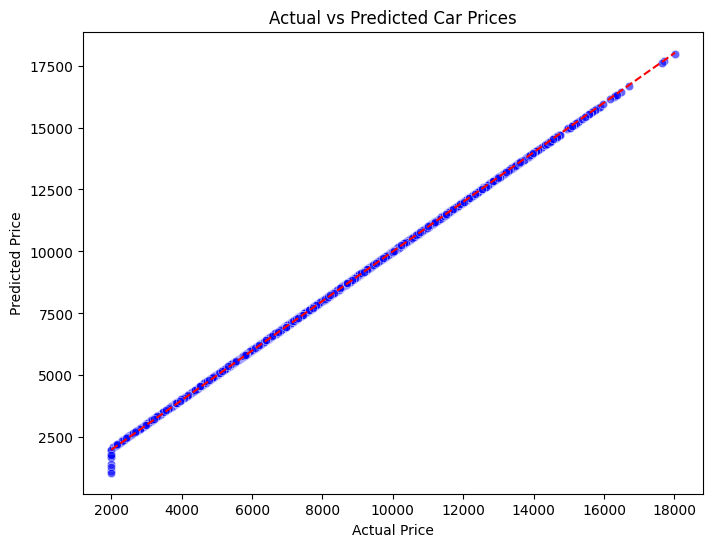

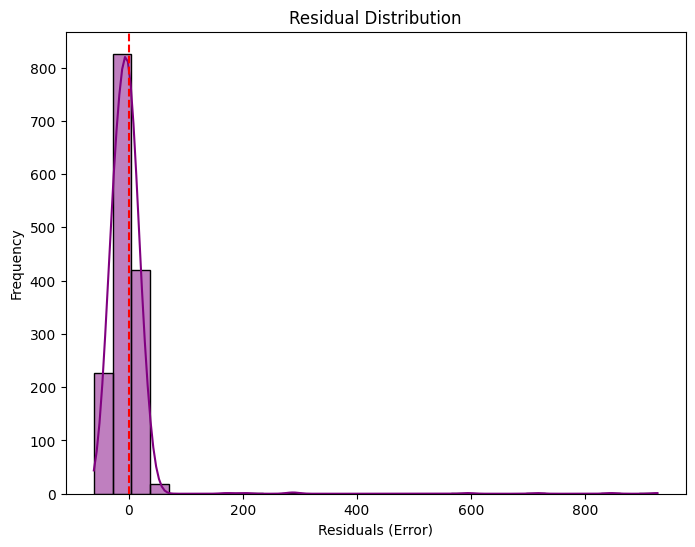

In [38]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ytest, y=y_pred, color='blue', alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

# Residual plot
residuals = ytest - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()